5장 모델 평가
------

In [1]:
# example code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import mglearn
import warnings
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
warnings.filterwarnings(action='ignore')
apple = font_manager.FontProperties(fname = '/Library/Fonts/AppleGothic.ttf').get_name()
rc('font', family = apple)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
X, y = make_blobs(random_state=0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
# Return the mean accuracy on the given test data and labels.
# logreg.score?

logreg.score(X_test, y_test)

0.88

## 5.1 Cross_validation : 교차 검증

데이터를 여러 번 반복해서 나누고 여러 모델을 학습
- 가장 널리 사용되는 방법은 K-fold cross_validation

  
  
### K-fold cross_validation
- k 는 특정 숫자, 보통 5 또는 10을 사용
- 데이터를 먼저 fold(폴드) 라고 하는 (거의) 비슷한 크기의 '부분 집합' 다섯 개로 나눔
- 그 다음 일련의 모델을 만듬
  - 첫 번째 모델은 첫 번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련 세트로 사용하여 학습, 즉 이 모델은 폴드 2~5까지의 데이터를 사용해 만들어지고 폴드 1을 사용해 정확도를 평가
  - 두 번쨰 모델은 두 번째 폴드를 테스트 세트로 사용하고 1,3,4,5 폴드를 훈련 데이터로 사용
  - 다섯 번의 분할 측정 후 결과를 냄

In [6]:
import mglearn

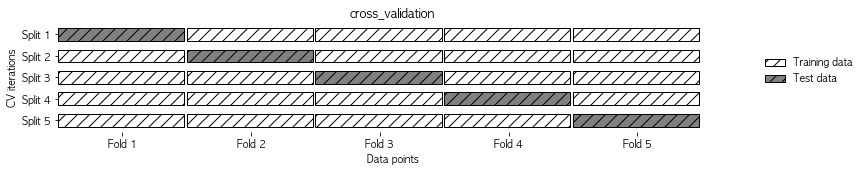

In [7]:
mglearn.plots.plot_cross_validation()

### 5.1.1 scikit-learn의 교차 검증

scikit-learn의 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현됨
- 매개변수는 모델과 훈련 데이터, 타깃 레이블

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [9]:
iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print(f"cross val socre : {scores}")

cross val socre : [1.         0.96666667 0.93333333 0.9        1.        ]


In [10]:
# 보통 간단하게 나타내려고 평균을 냄

print(f"cross val mean score : {scores.mean()}")

cross val mean score : 0.9600000000000002


In [11]:
# cross_val_score 와 비슷한 결과를 주는데 dict로 리턴함

from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

{'fit_time': array([0.00078607, 0.00049186, 0.0004859 , 0.00047517, 0.00046015]),
 'score_time': array([0.00027585, 0.00016594, 0.00017619, 0.00017786, 0.00017571]),
 'test_score': array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ]),
 'train_score': array([0.95      , 0.96666667, 0.96666667, 0.975     , 0.95833333])}

In [12]:
res_df = pd.DataFrame(res)
display(res_df)

,fit_time,score_time,test_score,train_score
0,0.000786,0.000276,1.000000,0.950000
1,0.000492,0.000166,0.966667,0.966667
2,0.000486,0.000176,0.933333,0.966667
3,0.000475,0.000178,0.900000,0.975000
4,0.000460,0.000176,1.000000,0.958333


In [13]:
res_df.mean()

fit_time       0.000540
score_time     0.000194
test_score     0.960000
train_score    0.963333
dtype: float64

### 5.1.2 교차 검증의 장점

**장점**
- train_test_split은 무작위로 나눌 경우 운에 의해 데이터 셋이 결정됨(한쪽에 쏠릴 경우도 발생)
- 교차검증을 이용하면 테스트 세트에 각 샘플이 정확하게 한 번씩 들어감
  - 각 샘플은 폴드 중 하나에 속하며, 각 폴드는 한 번씩 테스트 세트가 됨
  - 그렇기 때문에 교차 검증의 점수를 높이기 위해서 모든 샘플에 있는 모델일 일반화가 잘 되어야 함
- 데이터를 여러개로 나누다 보면 모델이 train data에 얼마나 민감한지 알 수 있다.
  - iris 데이터로 90~100%가 나왔는데 범위가 넒음
  - 이를 바탕으로 새로운 데이터를 적용했을 때 최악과 최선의 경우를 짐작할 수 있음
- train_test_split처럼 분할을 한 번 하는 것보다 더 효율적으로 데이터를 사용 할 수 있음

**단점**
- 연산 비용 증가
- 대략 모델 개수만큼 느림

**Notice**
- 교차 검증은 새로운 데이터에 적용할 모델을 만드는 방법이 아니라는 것을 잊지 말아야 함
- 교차 검증 함수는 모델을 반환하지 않음
- 교차 검증의 목적은 단지 주어진 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화될지 평가하는 것

### 5.1.3 계층별 K-겹 교차 검증과 그외 전략들

항상 K-fold로 나누는 건 좋지 않다. iris를 보자

In [14]:
iris = load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- 1/3은 0 클래스, 1/3은 1 클래스, 나머지 1/3은 2 클래스
- 교차 검증을 하면 특정 데이터만 가지게 된다.
- 이를 방지하기 위해서는 Stratified k-fold cross-validation(계층별 k-겹 교차 검증)을 사용
  - 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눔

cross_val_score 함수에서 폴드를 나눌 때...
- 분류 : StratifiedKFold 사용
- 회귀 : 단순 KFold 사용

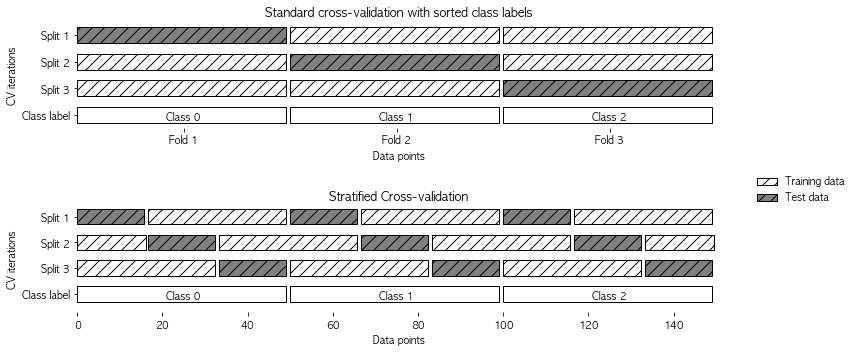

In [15]:
mglearn.plots.plot_stratified_cross_validation()

#### 교차 검증 상세 옵션

- cv parameter를 이용하여 폴드 개수 조정
- 교차 검증 분할기(cross-validation splitter)를 전달함으로써 데이털르 분할할 때 더 세밀하게 제어 가능

In [16]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [17]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [18]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [19]:
# KFold with suffle

kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.9  0.96 0.96]


#### LOOCV

- Leave-one-out cross-validation
- 교차 검증은 폴드 하나에 샘플 하나만 들어 있는 k-겹 교차 검증
- 각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용
- 데이터셋이 클 때는 시간이 매우 오래 걸리지만, 작은 데이터셋에서는 이따금 더 좋은 결과를 가져옴

In [20]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


#### 임의 분할 교차 검증
- 입력 예정

#### 그룹별 교차 검증
- 입력 예정

#### 반복 교차 검증
- 입력 예정

## 5.2 Grid search

매개 변수 튜닝
- 힘든 작업임
- 해야함
- 설정된 모든 조합을 해보는 것이라고 이해하면 편함

### 5.2.1 간단한 그리드 서치

In [21]:
# simple Grid seasrch

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters)) 

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### 5.2.2 The danger of overfitting the parameters and the validation set(매개변수 과대적합과 검증 세트)

- 위의 결과 모델 정확도가 97%, 오버피팅의 위험성
- 이 정확도는 새로운 데이터에까지 이어지지 않을 수 있다.
- 매개변수를 조정하기 위해 테스트 세트를 이미 사용했기 때문에 모델이 얼마나 좋은지 펴가하는 데는 더 이상 사용할 수 없다.
- 즉, 평가를 위해서는 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요

이를 해결하기 위해..데이터를 다시 나눠서 세 개의 세트로 만들어 이 문제를 해결할 수 있다.
- 훈련 세트로 모델을 만들고, 검증(또는 개발) 세트로는 모델의 매개변수를 선택하고, 테스트 세트로는 선택된 매개변수의 성능을 평가

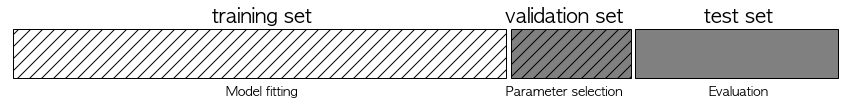

In [22]:
mglearn.plots.plot_threefold_split()

- 검증 세트를 사용해 최적의 매개변수를 선택한 후, 그 매개변수에서 훈련 세트와 검증 세트 데이터를 모두 이용해 모델을 다시 만듬
- 가능한 많은 데이터를 이용하기 위해서이다.

In [23]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 5.2.3 교차 검증을 사용한 그리드 서치

In [24]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
kfold = KFold(n_splits=10)

In [26]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=kfold)
        
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

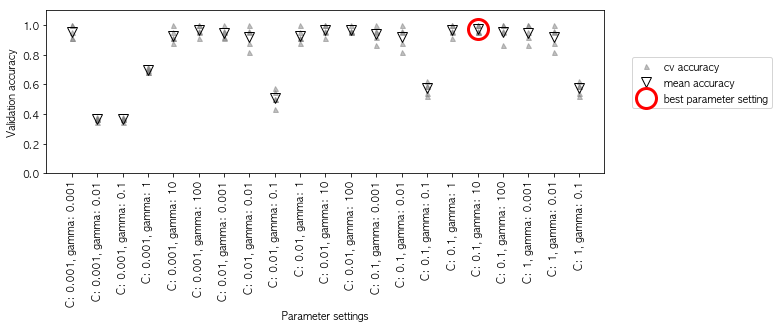

In [27]:
mglearn.plots.plot_cross_val_selection()

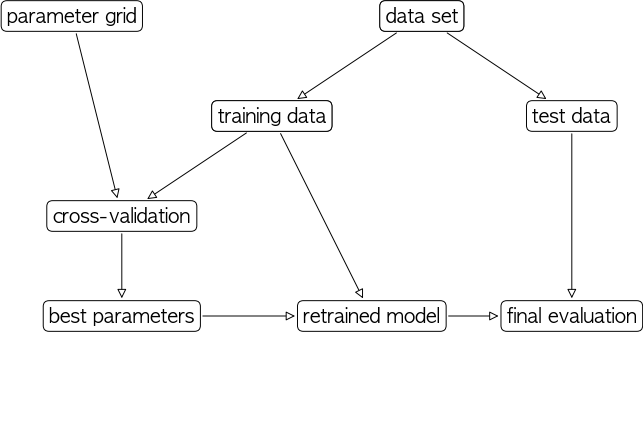

In [28]:
mglearn.plots.plot_grid_search_overview()

#### GridSearchCV 사용

In [29]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [31]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [32]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [33]:
print("Best parameters: {}".format(grid_search.best_params_))

# 최상의 교차 검증 정확도(이 매개변수 설정으로 각 분할에서 얻은 정확도의 평균)이 best_score_에 저장되어 있음
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


가끔은 만들어진 실제 모델에 직접 접근해야 할 때가 있다. 예를 들면...계수나 특성 중요도를 살필 때
- best_estimator_ 속성에서 얻을 수 있다.

In [34]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### 교차 검증 결과 분석
- 그리드 서치의 결과는 cv_results_ 속성에 담김

In [35]:
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000543,0.000117,0.000266,0.000048,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000513,0.000079,0.000239,0.000034,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000445,0.000005,0.000212,0.000012,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000447,0.000012,0.000212,0.000014,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000453,0.000014,0.000209,0.000010,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


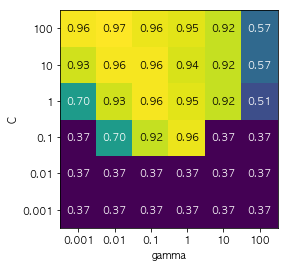

In [36]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

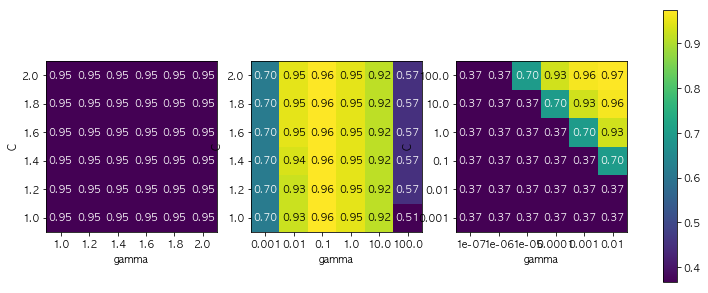

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

#### 비대칭 매개변수 그리드 탐색

- GridSearchCV에 전달할 param_grid를 딕셔너리의 리스트로 만들어서 전달하면, 비대칭 매개변수 적용 가능

In [38]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [39]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [40]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000518703,0.000512409,0.000570679,0.000522184,0.000500107,0.000550795,0.000538015,0.00042491,0.000440598,0.000549221,...,0.000281334,0.000374365,0.000592232,0.000857353,0.000523615,0.000410223,0.000350046,0.00031414,0.000300121,0.000306225
std_fit_time,7.80503e-05,0.00010368,3.07826e-05,7.93934e-05,2.24274e-05,8.28448e-05,7.11114e-05,4.21509e-06,7.65171e-06,0.000147493,...,1.6436e-05,3.52184e-05,9.38942e-05,0.000283587,0.000123723,6.08076e-05,4.65537e-05,1.4091e-05,1.25349e-05,2.49348e-05
mean_score_time,0.000240993,0.000243044,0.000280857,0.000237751,0.000241423,0.000282907,0.000261402,0.000207663,0.000201368,0.000214863,...,0.000177431,0.000189304,0.000201416,0.000250196,0.000214624,0.000214195,0.00024786,0.000193357,0.000174284,0.000180292
std_score_time,6.2989e-05,4.45881e-05,3.64558e-05,3.38546e-05,5.34888e-05,6.71741e-05,6.06267e-05,2.06537e-05,2.18826e-06,1.43324e-05,...,1.90377e-06,8.183e-06,1.43957e-05,2.22324e-05,2.18053e-05,3.78486e-05,0.000108142,1.7461e-05,1.49274e-06,1.09001e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.521739,0.347826,0.826087,0.913043,0.956522,1,1


### 중첩 교차 검증
- 내용 보강 할 것

## 5.3 평가 지표와 측정 - Evaluation Metrics and Scoring

### 5.3.1 생략

### 5.3.2 이진 분류의 평가 지표

- 이진 분류 : Positive class, Negative Class

#### 에러의 종류

정확도만으로 예측 성능을 측정하기에는 부족함


- 암진단
  - 양성 : 추가 검사 대상
  - 음성 : 건강


- 건강한 사람을 양성으로 분류하면...?
  - 잘못된 양성 예측을 거짓 양성이라고 함
  - false positive
  - type 1 error


- 암에 걸린 사람을 음성으로 분류
  - 잘못된 음성 예측 오류를 거짓 음성이라고 함
  - false negative
  - type 2 error

### Imbalanced datasets - 불균형 데이터셋
- 한 클래스가 다른 것보다 훨씬 많은 데이터셋을 불균형 데이터셋이라고 함
- 참고 : https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [41]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9 

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [42]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


- 90%가 나올리가...

In [43]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [44]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.82
logreg score: 0.98


### Confusion matrix - 오차 행렬
- 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법 중 하나

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix_result = confusion_matrix(y_test, pred_logreg)
print(confusion_matrix_result)

[[401   2]
 [  8  39]]


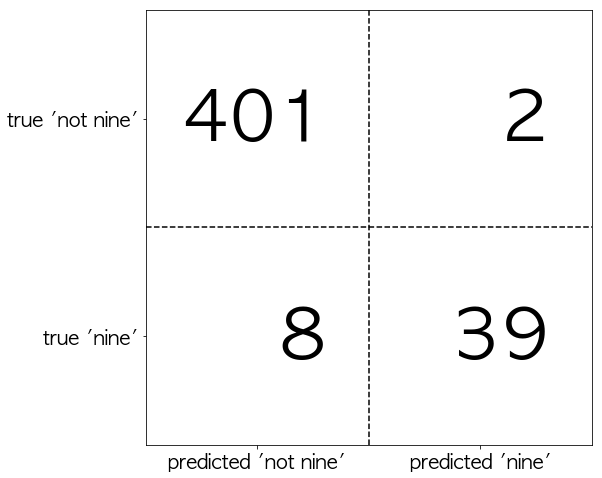

In [46]:
mglearn.plots.plot_confusion_matrix_illustration()

- 오차 행렬의 대각 행렬은 정확히 분류된 경우이고, 다른 항목은 한 클래스의 샘플들이 다른 클래스로 잘못 분류된 경우가 얼마나 많은지 알려줌
  - 대각 형렬? : A[i, i] ex) A[0, 0], A[1, 1]
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [47]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [48]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

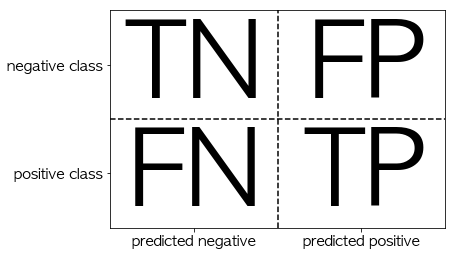

In [49]:
mglearn.plots.plot_binary_confusion_matrix()

- TP : 양성 클래스를 양성으로 예측함
- TN : 음성 클래스를 음성으로 예측함
- FP : 음성 클래스를 양성으로 잘못 예측함
- FN : 양성 클래스를 음성으로 잘못 예측함

In [50]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[362  41]
 [ 40   7]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


#### 정확도와의 관계

정확도 - accuracy
- (TP + TN) / (TP + TN + FP + FN)
- 정확도는 정확히 예측한 수(TP와 TN)를 전체 샘플 수(오차 행렬 모든 항목의 합)로 나눈 것
- 예측이 정답과 얼마나 정확한가?

#### 정밀도, 재현율, f-점수

**정밀도 - precision**
- 양성으로 예측된 것(TP + FP) 중 얼마나 많은 샘플이 진짜 양성(TP)인지 측정
- 예측한 것중에 정답의 비율은?
- TP / (TP + FP)
- precision은 FP를 줄이는 것이 목표일 때 성능 지표로 사용
- 예를 들어 임상 실험을 통해 신약의 치료 효과를 예측하는 모델이 있다고 함
  - 단 한 번의 실험으로 결과 잘 나오길 기대
  - 이럴 경우 거짓 양성(FP)이 많이 안 나오는게 중요
  - 다른 말로 하면 높은 정밀도가 필요
- 정밀도는 그래서 PPV - 양성 예측도 라고 함
  - Positive Predictive Value

**재현율 - recall**
- 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용
- 찾아야 할 것중에 실제로 찾은 비율은?
- 즉 거짓 음성(FN)을 피하는 것이 중요할 때 사용
- TP / (TP + FN)
- 예를 들면 건강한 사람이 일부 포함되더라도 암에 걸린 사람을 빠짐 없이 찾는 것
- 민감도(sensitivity), 적중률(hit rate), True Positive rate(TPR) 이라고도 함

presision과 recall은 상충함
- 그래서 둘 중 하나만으로 전체 그림을 볼 수는 없음


**f-점수 - f1-score**
- presision과 recall의 조화 평균은 f1-score을 이용함
- 두 항목을 같이 고려하므로 불균형한 이진 분류 데이터셋에서는 정확도보다 나은 지표가 될 수 있음


참고
- https://en.wikipedia.org/wiki/Confusion_matrix
- https://nittaku.tistory.com/295
- https://sumniya.tistory.com/26

<img src="confusion_matrix_note.PNG">

<img src="confusion_matrix_wiki.png">

In [52]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.15
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.89


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [54]:
print(classification_report(y_test, pred_dummy,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      0.90      0.90       403
           9       0.15      0.15      0.15        47

   micro avg       0.82      0.82      0.82       450
   macro avg       0.52      0.52      0.52       450
weighted avg       0.82      0.82      0.82       450



In [55]:
print(classification_report(y_test, pred_logreg,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



### 불확실성 고려
- 내용 추가 예정

In [57]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)        

---------

### 정밀도-재현율 곡선과 ROC 곡선

- 운영포인트(operating point) : 분류기의 필요조건을 지정 하는 것
- 명확하지 않은 경우가 많음
- 이런 경우 문제를 더 잘 이해하기 위해 모든 임계값을 조사해보거나, 한 번에 정밀도나 재현율의 모든 장단점을 살펴보는 것이 좋음


#### precision - recall curve : 정밀도 - 재현율 곡선

In [58]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

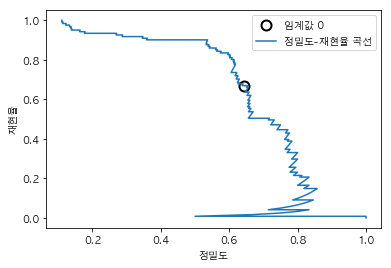

In [59]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

- 곡선이 오른쪽 위로 갈수록 더 좋은 분류기
- 오른쪽 위 지점은 한 임계값에서 정밀도와 재현율이 모두 높은 곳
- 곡선의 임계값이 매우 낮아 전부 양성 클래스가 되는 왼쪽 위에서 시작
- 임계값이 커지면서 곡선은 정밀도가 높아지는 쪼그로 ㅣ동하지만 재현율은 낮아짐
- 임계값을 높일수록 ㅑㅇ성으로 분류된 포인트 대부분이 진짜 양성(TP)이 되며, 정밀도가 매우 높아지지만 재현율은 낮아짐
- **정밀도가 높아져도 재현율이 높게 유지될수록 더 좋은 모델**

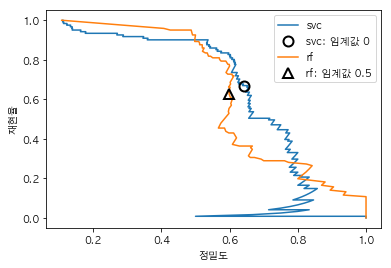

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="svc: 임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

In [61]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [62]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


### ROC 곡선
- 여러 임계값에서 분류기의 트성을 분석하는 데 널리 사용하는 도구
- 모든 임계값을 고려
- 진짜 양성 비율(TPR)에 대한 거짓 양성 비율(FPR)을 나타냄
  - TPR = recall
  - FPR = FP / (FP + TN)

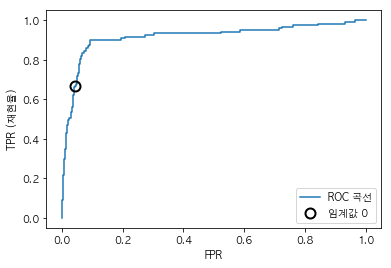

In [63]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

- ROC 곡선은 왼쪽 위에 가까울수록 이상적
- 거짓 양성 비율(FPR)이 낮게 유지 되면서 재현율이 높은 분류기가 좋은 것

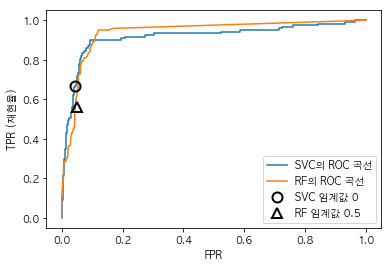

In [64]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

- 곡선 아래의 면적값 하나로 ROC 곡선을 요약할 때가 많음
- 이 면적을 보통 AUC(area under the curve)
  - AUC는 0과 1사이의 곡선 아래 면적이므로 항상 0(최악)과 1(최선) 사이의 값을 가짐
  - 아무리 클래스가 불균형하더라도 무작위로 예측한 AUC 값은 0.5가 됨(값이 같으면 결국 일직선이 되니까)
- 불균형 데이터셋에서는 정확도보다 AUC가 훨씬 좋은 지표
  - AUC는 양성 샘플의 순위를 평가하는 것으로 볼 수 있다.
  - 이는 분류기에서 ㅜ작위로 선택한 양성 클래스 포인트의 점수가 무작위로 선택한 음성 클래스 포인트의 점수보다 높을 확률과 같다.
  - 그래서 AUC가 1일 때는 모든 양성 포인트의 점수가 모든 음성 포인트의 점수보다 높다.

In [65]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


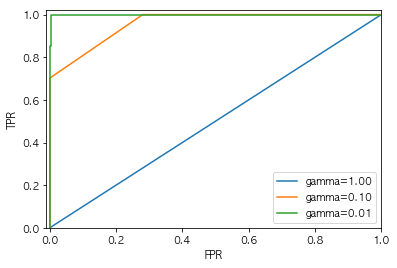

In [66]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

### 5.3.3 다중 분류의 평가 지표

- 다중 분류는 이진 분류를 기반으로 유래
- 다만 해석이 어려움

In [67]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)

lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)

print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))

정확도: 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


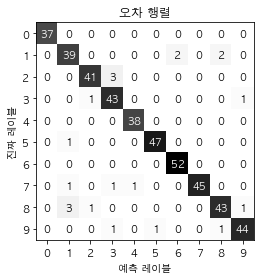

In [68]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("오차 행렬")
plt.gca().invert_yaxis()

In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



- 0은 오차가 없으므로 1이 나옴
- 클래스 7은 다른 클래스가 7로 잘못 분류한 것이 없어서 정밀도(precision)이 0
- 클래스 6은 거짓 음성(FN)이 없어서 재현율(recall)이 1이다.
- 이 모델은 1,3,8을 분류하는데 어려움을 겪는다.

다중 분류에서 불균형 데이터셋을 위해 가장 널리 사용하는 평가 지표는 f1-점수의 다중 분류 버전
- 다중 클래스용 f1-score는 한 클래스를 야성 클래스로 두고 나머지 클래스들을 음성 클래스로 간주하여 클래스마다 f1-score 계산
- 그런 다음 클래스 별로 클래스별 f1-score점수를 아래 전략 중 하나를 사용하여 평균 냄
  - macro 평균 : 가중치 없이 동일한 비중으로 다룸
  - weighted 평균 : 클래스별 샘플 수로 가중치를 두어 f1-score 평균 구함
  - micro 평균 : 모든 클래스의 FP, FN, TP의 총수를 헤아린 다음 recall, precision, f1-score를 계산

In [70]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


### 5.3.4 회귀의 평가 지표
- 회귀 평가는 분류에서와 비슷하게 할 수 있음
- 그러나 대부분 R^2(회귀선을 설명하는 공식)만 이용해도 충분
- MSE, RMSE 등을 이용할수도 있음

### 5.3.5 모델 선택에서 평가 지표 사용하기
- GridSearchCV, cross_val_score를 사용하여 모델을 선택할 때, AUC 같은 평가 지표를 사용하고 싶은 경우가 많다.
- 역시 구현해놓음

In [71]:
# 분류의 기본 평가 지표는 정확도 입니다
print("기본 평가 지표:",
      cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
# scoring="accuracy"의 결과와 같습니다.
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("정확도 지표:", explicit_accuracy)
ap =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="average_precision", cv=5)
print("평균 정밀도 지표:", ap)

기본 평가 지표: [0.9        0.9        0.89972145 0.89972145 0.89972145]
정확도 지표: [0.9        0.9        0.89972145 0.89972145 0.89972145]
평균 정밀도 지표: [0.97968342 0.97740563 0.9781204  0.99040404 0.95507256]


In [72]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "average_precision", "recall_macro"],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,0.170643,0.111651,0.900000,1.0,0.979683,1.0,0.5,1.0
1,0.165349,0.097501,0.900000,1.0,0.977406,1.0,0.5,1.0
2,0.161877,0.098433,0.899721,1.0,0.978120,1.0,0.5,1.0
3,0.160110,0.097818,0.899721,1.0,0.990404,1.0,0.5,1.0
4,0.160385,0.097913,0.899721,1.0,0.955073,1.0,0.5,1.0


In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드를 만듭니다
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

# 기본 정확도 측정 지표를 사용합니다
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      # grid.score 점수와 동일합니다
      accuracy_score(y_test, grid.predict(X_test))))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도)): 0.970
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


In [75]:
# 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision")
grid.fit(X_train, y_train)

print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (평균 정밀도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      # grid.score 점수와 동일합니다
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      accuracy_score(y_test, grid.predict(X_test))))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수 (평균 정밀도): 0.985
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.896


In [76]:
from sklearn.metrics.scorer import SCORERS
print("가능한 평가 방식:\n", sorted(SCORERS.keys()))

가능한 평가 방식:
 ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


#### Scoring

**분류**
- accuracy
- ROC
- roc_auc
- 정확도-재현율 곡선의 아래 면적인 average_precision
- f1_score : macro, micro, weighted

**회귀**
- R^2
- mean_squared_error : 평균 제곱 오차
- mean_absolute_error : 평균 절댓값 오차